In [1]:
 # Librairies de manipulation de données
import pandas as pd
import numpy as np
import scipy as sp

# Librairies graphiques
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import matplotlib.image as image
import cv2                  #To display an image using opencv cv2 library
import matplotlib.cbook as cbook
#import matplotlib as mpl
import seaborn as sns
from textwrap import wrap

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',1000)  
pd.set_option('display.max_colwidth',None)

In [2]:
import nltk
#nltk.download()
import string as st
import re
from nltk import PorterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict  # For word frequency
from nltk.corpus import stopwords
from nltk import RegexpTokenizer

In [3]:
import gensim
import os
import csv
from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier

In [4]:
#!pip install --upgrade kneed
from kneed import KneeLocator
import random
import math
import sys
import shutil
from datetime import datetime

In [5]:
from PIL import Image, ImageOps, ImageFilter

In [6]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
df=pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")
df.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multicolor""}, {""key""=>""Length"", ""value""=>""213 cm""}, {""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""2 Curtains""}, {""key""=>""Material"", ""value""=>""Polyester""}]}"


In [8]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [9]:
df['image'].nunique()

1050

In [10]:
df['image'][1]

'7b72c92c2f6c40268628ec5f14c6d590.jpg'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [12]:
len(df['image'])

1050

In [13]:
df_train = df.loc[:, ["image", "product_category_tree"]]

In [14]:
# On crée une liste de strings en supprimant les >>
df = df_train["product_category_tree"].str.split(">>")

# Et on ne récupère que la deuxième valeur de la liste
# Ce qui correspondra à notre catégorie de produits
df_train["cat_1"] = df.apply(lambda x: x[0])

In [16]:
def chemin_complet(image):
    
    # Cette fonction permet de reformater le champs image
    # afin d'avoir le chemin complet dans le but de les
    # charger plus facilement
    
    image = "/Users/asus2/PROJET 6/Images/" + image
    
    return image

In [17]:
# On repart de notre dataframe df_train + colonne "image"

# On reformate la colonne image 

df_train["image"] = df_train["image"].apply(chemin_complet)


df_train.head(2)

,image,product_category_tree,cat_1
0,/Users/asus2/PROJET 6/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]","[""Home Furnishing"
1,/Users/asus2/PROJET 6/Images/7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]","[""Baby Care"


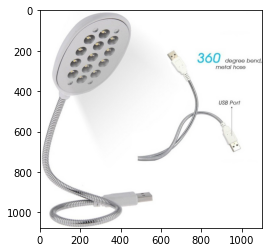

In [18]:
plt.style.use('default')
imge = plt.imread("/Users/asus2/PROJET 6/Images/fffa2117a4006d4a848eb7d5b80d4816.jpg")
# Afficher l'image chargée
plt.imshow(imge) 

In [19]:
# informations
print( 'classe :', type(imge) )
print( 'type :', imge.dtype )
print( 'taille :', imge.shape )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (1077, 1100, 3)


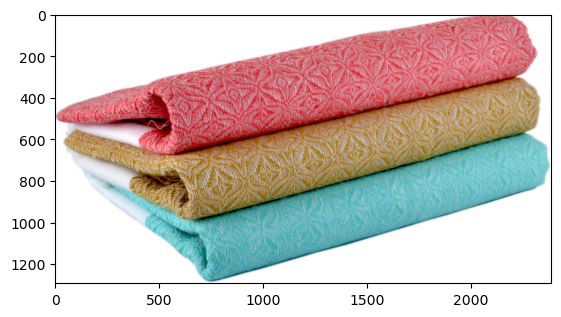

In [20]:
plt.style.use('default')
img = plt.imread(df_train["image"][1])
# Afficher l'image chargée
plt.imshow(img)

[     1      2      0      0      0      0      2      1      1      3
      2      0      1      3      7      8      0     10      5      4
      2      9      1     13     12     10     14      8      9     17
     12     32     10     24     26     29     30     28     37     15
     26     44     39     57     20     44     42     45     47     62
     61     56     31     85     41     64    109     40     86     48
    145     75    119    132     69    137    143    139    152    165
    158    197    202    206    241    231    252    277    214    216
    354    229    312    311    356    388    326    424    316    393
    408    336    400    419    455    367    399    398    439    453
    502    440    358    538    394    471    465    589    379    525
    519    455    492    658    568    400    525    661    394    542
    544    648    415    560    554    589    712    538    420    562
    573    555    599    614    628    588    605    664    639    695
    70

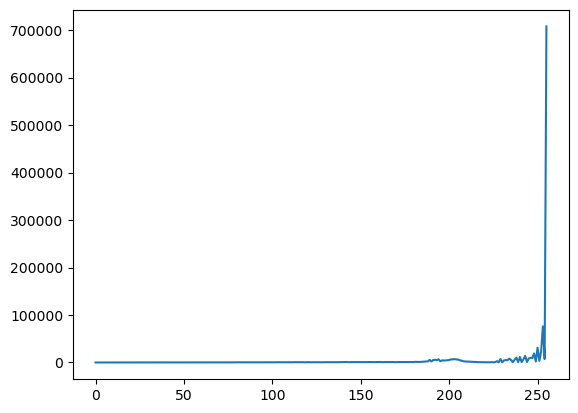

In [22]:

# Convertit l'image en niveaux de gris Y
imge = cv2.imread("/Users/asus2/PROJET 6/Images/fffa2117a4006d4a848eb7d5b80d4816.jpg")
b,v,r = cv2.split(imge)         # récupère 3 matrices d'octets séparées
y = 0.299*r + 0.587*v + 0.114*b # opération matricielle
y = y.astype(np.uint8)          # convertit les réels en octets

# Calcule l'histogramme de l'image
hist = np.zeros(256, int)       # prépare un vecteur de 256 zéros (pour chaque gris)
for i in range(0,imge.shape[0]):      # énumère les lignes
    for j in range(0,imge.shape[1]):  # énumère les colonnes
          hist[y[i,j]] = hist[y[i,j]] + 1

print(hist)
plt.plot(hist)
plt.show()


In [23]:
df.head(2)

0                             [["Home Furnishing ,  Curtains & Accessories ,  Curtains ,  Elegance Polyester Multicolor Abstract Eyelet Do..."]]
1    [["Baby Care ,  Baby Bath & Skin ,  Baby Bath Towels ,  Sathiyas Baby Bath Towels ,  Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]]
Name: product_category_tree, dtype: object

### <b> Extract keypoints from each image:<b>

- Loading photos containing images 
- Remove background 
- Convert to grayscale 
- Apply histogram equalization 
- Extract image features with help of SIFT or ORB

#### <b> Import of image <b>

In [26]:
path = "/Users/asus2/PROJET 6/Images/"
list_photos = [file for file in os.listdir(path)]
print(len(list_photos))

1050


#### <b> Computing descriptors : <b>

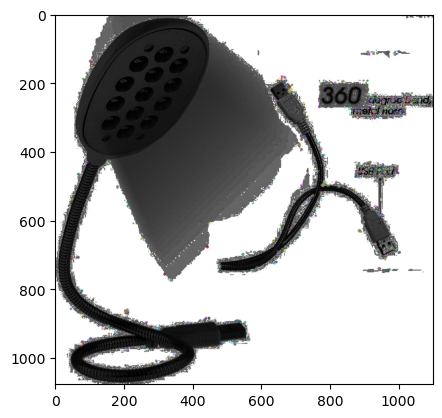

Descripteurs :  (500, 32)

[[195 157  39 ...   4 177 125]
 [250 180 113 ...  68 228 127]
 [ 36 244  53 ...  42 199  34]
 ...
 [252 188 190 ... 241 194  43]
 [212  72  95 ... 179  33  33]
 [ 38 233  96 ...  59  82 128]]


In [27]:

from cv2 import cvtColor, IMREAD_GRAYSCALE
#img = cv2.imread('0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg',0)
img = cv2.imread("/Users/asus2/PROJET 6/Images/fffa2117a4006d4a848eb7d5b80d4816.jpg",0)
img = cv2.equalizeHist(img)   # equalize image histogram
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None)
plt.imshow(img2), plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)



In [28]:
cv2.imread("/Users/asus2/PROJET 6/Images/fffa2117a4006d4a848eb7d5b80d4816.jpg",0)

array([[255, 255, 255, ..., 254, 255, 255],
       [255, 255, 255, ..., 254, 254, 255],
       [255, 255, 255, ..., 254, 254, 254],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

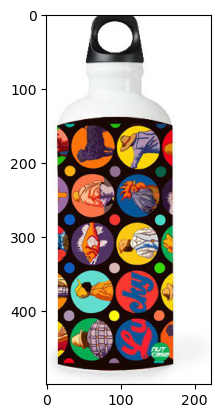

In [29]:
plt.style.use('default')
img = plt.imread(path+list_photos[8])
# Afficher l'image chargée
plt.imshow(img)

[    0     1    27    38    89   208   310   528   829  1023  1676  2521
  2808  2101  1470  1010   673   445   340   260   189   193   128   156
   136   139   140   111   119   130   150   169   170   200   264   286
   281   235   250   161   171   162   136   158   141   150   189   144
   156   155   150   152   158   142   168   170   169   154   199   217
   217   225   247   275   351   394   433   451   662   685   526   473
   396   367   299   317   275   266   243   237   192   194   173   165
   146   141   119   143   145   134   151   138   172   161   166   197
   198   223   210   234   219   187   151   151   165   167   178   192
   237   253   317   376   393   457   448   330   259   241   180   173
   138   140   164   150   173   160   200   181   176   193   174   160
   138   120   104   107   105   115   118   112   172   182   240   274
   299   236   231   230   199   204   219   289   249   256   188   177
   182   202   164   154   155   154   123   125   

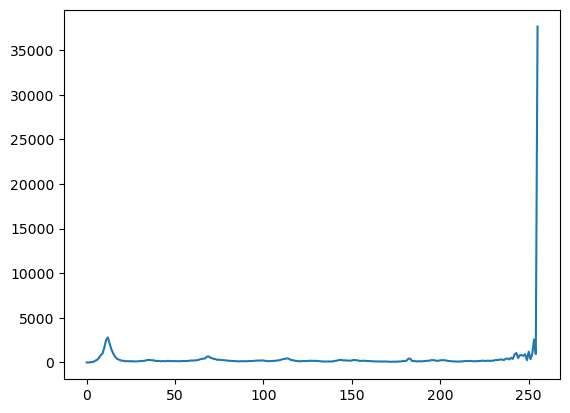

In [30]:
# Convertit l'image en niveaux de gris Y
#imge = cv2.imread('/content/drive/MyDrive/PROJET 6/Images/0b852704f2002f8865a68818ad4951da.jpg')
imge = cv2.imread(path+list_photos[8])
b,v,r = cv2.split(imge)         # récupère 3 matrices d'octets séparées
y = 0.299*r + 0.587*v + 0.114*b # opération matricielle
y = y.astype(np.uint8)          # convertit les réels en octets

# Calcule l'histogramme de l'image
hist = np.zeros(256, int)       # prépare un vecteur de 256 zéros (pour chaque gris)
for i in range(0,imge.shape[0]):      # énumère les lignes
    for j in range(0,imge.shape[1]):  # énumère les colonnes
          hist[y[i,j]] = hist[y[i,j]] + 1

print(hist)
plt.plot(hist)
plt.show()

### <b> Algorithm SIFT :<b>

##### <b> Détermination et affichage des descripteurs SIFT :<b>

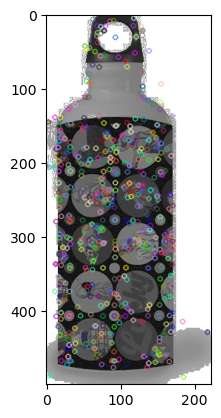

Descripteurs :  (564, 128)

[[  2.   0.   0. ...   0.   0.   6.]
 [  2.   2.  12. ...   0.   0.   0.]
 [ 26.   6.   0. ...   0.   0.   1.]
 ...
 [ 56.   0.   0. ...   0.   0.   0.]
 [  8.   0.   0. ...   0.   0.   1.]
 [105. 151.   0. ...   0.   0.   0.]]


In [31]:
import time,cv2
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()
#image = cv2.imread(path+"/"+list_photos[2],0) # convert in gray
image = cv2.imread(path+list_photos[8],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

#### <b> Création des descripteurs de chaque image:<b>

In [32]:
# SIFT Algorithm  
# identification of key points and associated descriptors
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create()

for image_num in range(len(list_photos)):
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1432/2841286699.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)



Nombre de descripteurs :  (9051251, 128)
temps de traitement SIFT descriptor :          1406.71 secondes


##### <b> Création des clusters des descripteurs : <b>

Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [33]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  3009
Création de 3009 clusters de descripteurs ...
temps de traitement kmeans :           423.96 secondes


##### <b> Création des features des images:<b>

In [34]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img):
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features_sift = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :            93.02 secondes


In [35]:
im_features_sift.shape

(1050, 3009)

### <b> Algorithm ORB :<b>

##### <b> Détermination et affichage des descripteurs ORB :<b>

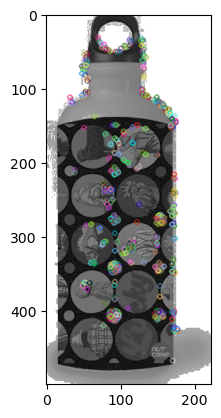

Descripteurs :  (457, 32)

[[ 31 105  38 ... 191  49  81]
 [ 72 184 148 ...  72 194  46]
 [  2 233 214 ...  24 225 136]
 ...
 [192 133 177 ... 224 212 104]
 [ 96 209  92 ...   8 168  26]
 [153  67  58 ... 255  60  78]]


In [36]:
orb = cv2.ORB_create()
#image = cv2.imread(path+"/"+list_photos[2],0) # convert in gray
image = cv2.imread(path+list_photos[8],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = orb.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [37]:

# ORB Algorithm  
# identification of key points and associated descriptors

orb_keypoints = []
temps1=time.time()
orb = cv2.ORB_create()

for image_num in range(len(list_photos)):
    if image_num%100 == 0 : print(image_num)
    #image = cv2.imread(path+"/"+list_photos[image_num],0) # convert in gray
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints)
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (520145, 32)
temps de traitement ORB descriptor :            35.80 secondes


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1432/2917145998.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  orb_keypoints_by_img = np.asarray(orb_keypoints)


In [38]:
# Determination number of clusters  for ORB
temps1=time.time()

k = int(round(np.sqrt(len(orb_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans_orb = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans_orb.fit(orb_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  721
Création de 721 clusters de descripteurs ...
temps de traitement kmeans :             3.82 secondes


In [39]:
# Creation of histograms (features) ORB
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors_orb=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist_orb = build_histogram(kmeans_orb, image_desc, i) #calculates the histogram
    hist_vectors_orb.append(hist_orb) #histogram is the feature vector

im_features_orb = np.asarray(hist_vectors_orb)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             5.36 secondes


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn import manifold, decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


### <b> Réduction de dimension :<b>

In [41]:
def display_scree_plot(pca, dpi=100):
    """ Affiche le graphique des éboulis des valeurs propres 
    et le critère de Kaiser
    On utilise le code de Nicolas Rangeon (avec qques modifications)
    disponible ici :
    https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-
    exploratoire-de-donnees/5345201-tp-realisez-une-acp
    Args :
    - pca : sklearn.decomposition.PCA
    - dpi : résolution du tracé matplotlib.
    Returns : 
    - graphique matplotlib
    """
    scree = pca.explained_variance_ratio_ * 100
    plt.style.use('seaborn')
    plt.figure(edgecolor='black', linewidth=4, dpi=dpi)
    plt.bar(np.arange(len(scree)) + 1, scree)
    plt.plot(np.arange(len(scree)) + 1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.axhline(100 / pca.n_features_,
                0,
                len(pca.components_) + 1,
                c='green',
                linewidth=0.6)  # critère de Kaiser
    plt.show(block=False)


def display_circles(pca,
                    axis_ranks,
                    labels=None,
                    label_rotation=0,
                    lims=None,
                    size_nom_variable=18):
    """ Affiche les cercles des corrélation pour les plan factoriels.
    On utilise le code de Nicolas Rangeon (avec qques modifications) 
    disponible ici :
    https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-
    exploratoire-de-donnees/5345201-tp-realisez-une-acp
    Args :
    - pca : sklearn.decomposition.PCA
    - axis_ranks : liste des plans factoriel à tracer. 
    Exemple :  [(0,1), (2,3)] pour tracer les deux premiers plans.
    - labels : liste de nom des variables.
    - label_rotation : rotation (degrés) de l'affichage des labels.
    - lims : 'auto' ou 'None' ou tuple (xmin, xmax, ymin, ymax)
    des limites du tracé.
    - size_nom_variable : taille de l'affichage  des variables projetées.
    Returns : 
    - affiche une figure matplotlib.
    """
    n_comp = pca.n_components_
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            plt.style.use('seaborn')
            plt.figure(edgecolor='black', linewidth=4, figsize=(10, 10))

            # détermination des limites du graphique
            pcs = pca.components_
            if lims == 'auto':
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(pcs[d1, :]), min(
                    pcs[d2, :]), max(pcs[d2, :])
            elif lims is not None:  # lims est un tuple
                xmin, xmax, ymin, ymax = lims
            else:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]),
                           np.zeros(pcs.shape[1]),
                           pcs[d1, :],
                           pcs[d2, :],
                           angles='xy',
                           scale_units='xy',
                           scale=1,
                           color="grey",
                           width=0.001)

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x,
                                 y,
                                 labels[i],
                                 fontsize=str(size_nom_variable),
                                 ha='center',
                                 va='center',
                                 rotation=label_rotation,
                                 color="blue",
                                 alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(
                d1 + 1, d2 + 1))
            plt.axis('square')

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
            plt.show()


def display_factorial_planes(X_projected,
                             pca,
                             axis_ranks,
                             labels=None,
                             size=5,
                             alpha=1,
                             illustrative_var=None):
    """ Affiche les objets (i.e. les lignes du dataset) 
    sur les plan factoriels.
    On utilise le code de Nicolas Rangeon (avec qques modifications) 
    disponible ici :
    https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-
    exploratoire-de-donnees/5345201-tp-realisez-une-acp
    Args :
    - X_projected : array numpy contenant les données (X) après scaling et 
    projection : X_projected = pca.transform(X_scaled)
    - pca : sklearn.decomposition.PCA
    - axis_ranks : liste des plans factoriel à tracer. 
    Exemple :  [(0,1), (2,3)] pour tracer les deux premiers plans.
    - labels : liste de nom des objets.
    - alpha : alpha ("transparence").
    - illustrative_var : variable catégorielle (série pandas avec 
    même nombre d'objets que X_projected) ; ajout d'une couleur sur le 
    tracé pour chaque valeur de la variable.
    Returns : 
    - affiche une figure matplotlib.
    """
    n_comp = pca.n_components_

    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            plt.figure(edgecolor='black', linewidth=4, figsize=(7, 6))

            # affichage des points
            if illustrative_var is None:
                plt.style.use('seaborn')
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2],
                            alpha=alpha, s=size)
            else:
                plt.style.use('default')
                from matplotlib import rcParams
                from cycler import cycler
                rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1],
                                X_projected[selected, d2],
                                alpha=alpha, s=size,
                                label=value)
                plt.legend(markerscale=3, frameon=False)

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x + 0.1,
                             y + 0.1,
                             labels[i],
                             fontsize='12',
                             ha='center',
                             va='center')

            # détermination des limites du graphique
            xmin = np.min(X_projected[:, d1])
            xmax = np.max(X_projected[:, d1])
            xdelta = xmax - xmin
            ymin = np.min(X_projected[:, d2])
            ymax = np.max(X_projected[:, d2])
            ydelta = ymax - ymin
            plt.xlim(xmin - 0.02 * xdelta, xmax + 0.02 * xdelta)
            plt.ylim(ymin - 0.02 * ydelta, ymax + 0.02 * ydelta)

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)))

            plt.title("Projection (sur F{} et F{})".format(
                d1 + 1, d2 + 1))
            plt.show(block=False)


def draw_tsne(X, perplexites, illustrative_var, color='bgrcmyk', dpi=100):
    """ Visualisation t-SNE en 2 dimensions, avec ajout de labels de couleurs sur les données.
    Args :
    - X : ndarray of shape (n_samples, n_features), la data à réduire par le t-SNE.
    - perplexites : liste de perplexités à tracer.
    - illustrative_var : série de longueur n_samples avec les labels de la data
    - color : couleurs utilisées pour la légende.
    - dpi : résolution du tracé matplotlib.
    Returns :
    - void (tracé matplotlib).
    """
    from cycler import cycler
    from matplotlib import rcParams
    from sklearn import manifold

    rcParams['axes.prop_cycle'] = cycler(color=color)

    for perplexity in perplexites:
        plt.figure(edgecolor='black', linewidth=4, figsize=(6, 6), dpi=dpi)
        tsne = manifold.TSNE(
            n_components=2, random_state=0, perplexity=perplexity)
        data_reduced_tsne = tsne.fit_transform(X)
        illustr_var = np.array(illustrative_var)
        for value in np.unique(illustr_var):
            selected = np.where(illustr_var == value)
            plt.scatter(
                data_reduced_tsne[selected, 0], data_reduced_tsne[selected, 1], s=4, label=value)
        plt.title('PLONGEMENT t-SNE - perplexité = ' +
                  str(perplexity), fontsize=10)
        plt.legend(markerscale=3, frameon=True, fontsize=7)
        plt.show()

#Cellule de code <undefined>
##%% [code]




In [42]:
X=im_features_sift

In [43]:
type(X)

numpy.ndarray

In [44]:
X

array([[1.13327289e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.72677695e-04, 1.90874386e-03, 3.63570260e-03, ...,
        0.00000000e+00, 9.08925650e-05, 0.00000000e+00],
       [0.00000000e+00, 7.37839832e-04, 0.00000000e+00, ...,
        1.70270730e-04, 4.54055281e-04, 2.27027641e-04],
       ...,
       [1.47407833e-05, 2.80074883e-04, 1.17926267e-04, ...,
        1.76889400e-04, 8.84447000e-05, 4.42223500e-04],
       [2.34521576e-04, 2.34521576e-04, 2.34521576e-04, ...,
        0.00000000e+00, 2.34521576e-04, 9.38086304e-04],
       [6.60938533e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.30469266e-04, 6.60938533e-04]])

In [45]:
len(X)

1050

In [46]:
df_train['cat_1'].nunique()

7

In [47]:
df_train['cat_1'].value_counts()

["Home Furnishing                150
["Baby Care                      150
["Watches                        150
["Home Decor & Festive Needs     150
["Kitchen & Dining               150
["Beauty and Personal Care       150
["Computers                      150
Name: cat_1, dtype: int64

In [95]:
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from termcolor import colored, cprint
from sklearn.metrics import adjusted_rand_score, rand_score, silhouette_score, confusion_matrix
time1 = time.time()
km = KMeans(n_clusters=7, init='k-means++', max_iter=1000, n_init=100)
#km = KMeans(n_clusters=7, init='k-means++', max_iter=1000)
km.fit(im_features_sift)
#km.fit_predict(feat_pca) # fit_predict
#km.fit(X)
cprint("Adjusted Rand Index: %.5f" %
      adjusted_rand_score(df_train['cat_1'], km.labels_), 'red')
      # adjusted_rand_score(df_train['image'], km.labels_), 'red')
time2 = np.round(time.time() - time1,0)
print("time : ", time2)
#print("Rand Index: %.2f" % rand_score(df_train['cat_1'], km.labels_))


Adjusted Rand Index: 0.00013
time :  7.0


#### <b> Réduction de dimension PCA pour SIFT :<b>

Dimensions dataset avant PCA :  (1050, 3009)
Dimensions dataset après PCA :  (1050, 883)


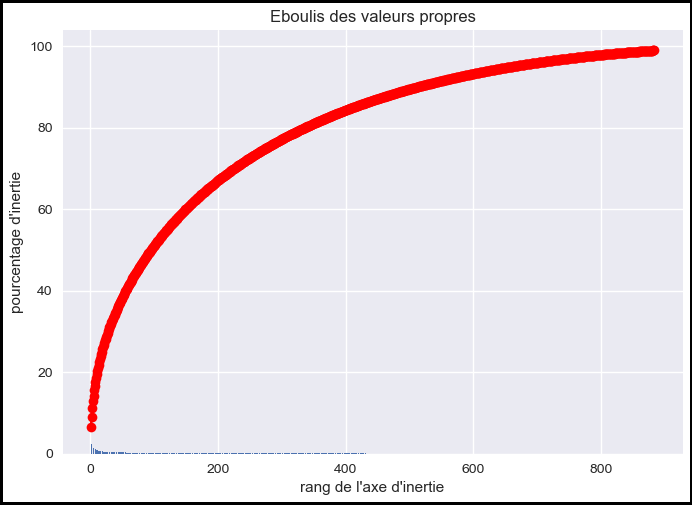

In [96]:

from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
print("Dimensions dataset avant PCA : ", X.shape)
pca = decomposition.PCA(n_components=0.99)
#X_dense = csr_matrix.todense(X)   # convertit une sparse matrix en dense matrix
#X_dense = csr_matrix.todense(im_features_sift)   # convertit une sparse matrix en dense matrix
X_scaled = StandardScaler().fit_transform(X)   # données normalisées
#X_scaled = StandardScaler().fit_transform(im_features_sift)   # données normalisées
feat_pca = pca.fit_transform(X_scaled)
#feat_pca = pca.fit_transform(im_features_sift)
print("Dimensions dataset après PCA : ", feat_pca.shape)
display_scree_plot(pca)


In [50]:
#####

#### <b> Kmeans Clustering pour SIFT :<b>

In [97]:
#import time
time1 = time.time()
km = KMeans(n_clusters=7, init='k-means++', max_iter=1000, n_init=100)
#km = KMeans(n_clusters=7, init='k-means++', max_iter=1000)
km.fit(feat_pca)
#km.fit_predict(feat_pca) # fit_predict
#km.fit(X)
cprint("Adjusted Rand Index: %.5f" %
      adjusted_rand_score(df_train['cat_1'], km.labels_), 'red')
      # adjusted_rand_score(df_train['image'], km.labels_), 'red')
time2 = np.round(time.time() - time1,0)
print("time : ", time2)
#print("Rand Index: %.2f" % rand_score(df_train['cat_1'], km.labels_))


Adjusted Rand Index: -0.00057
time :  3.0


In [98]:
km.labels_

array([1, 6, 0, ..., 6, 6, 6], dtype=int32)

In [99]:
df_train['cluster']=km.labels_

In [100]:
len(km.labels_)

1050

In [101]:

for i in range(len(km.cluster_centers_)):
    print("Cluster", i)
   # print("Center:", km.cluster_centers_[i])
    print("Size:", sum(km.labels_ == i))


Cluster 0
Size: 107
Cluster 1
Size: 278
Cluster 2
Size: 1
Cluster 3
Size: 1
Cluster 4
Size: 104
Cluster 5
Size: 205
Cluster 6
Size: 354


In [56]:
"""
for i in range(len(km.cluster_centers_)):
    print("Cluster", i)
   # print("Center:", km.cluster_centers_[i])
    print("Size:", sum(km.labels_ == i))
"""

'\nfor i in range(len(km.cluster_centers_)):\n    print("Cluster", i)\n   # print("Center:", km.cluster_centers_[i])\n    print("Size:", sum(km.labels_ == i))\n'

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


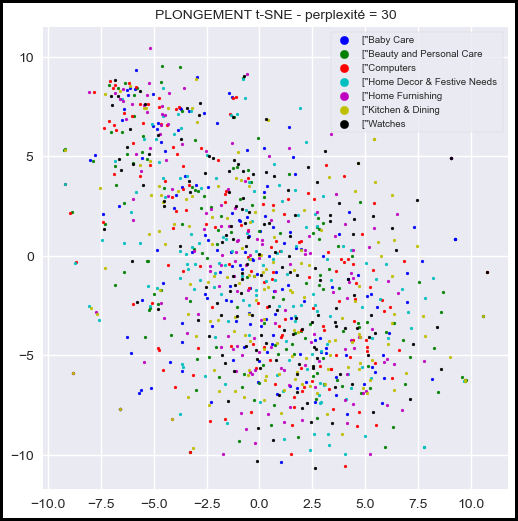

In [102]:

perplexities = [30]
plt.style.use('seaborn')
draw_tsne(feat_pca, perplexities, df_train['cat_1'])

#### <b> Réduction de dimension T-SNE pour SIFT :  <b>

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


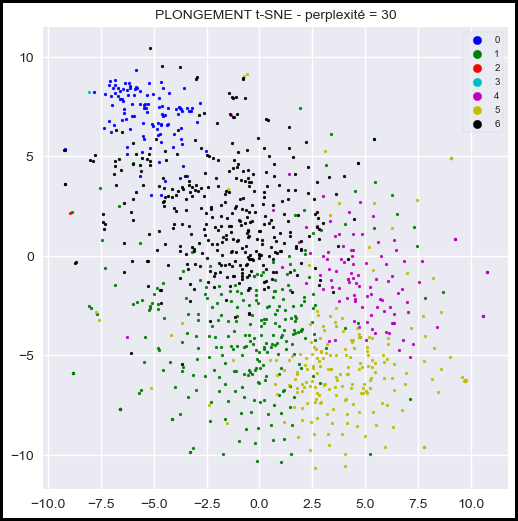

In [103]:

perplexities = [30]
plt.style.use('seaborn')
draw_tsne(feat_pca, perplexities, df_train['cluster'])


In [104]:
df_train["cluster"]=km.labels_

In [105]:
df_train["cluster"]

0       1
1       6
2       0
3       6
4       1
       ..
1045    1
1046    6
1047    6
1048    6
1049    6
Name: cluster, Length: 1050, dtype: int32

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train["cat_encoded"] = le.fit_transform(df_train["cat_1"])


In [107]:
labels =df_train["cat_encoded"]

In [108]:
df_tri_cat = df_train.sort_values(by="cat_encoded")

In [109]:
df_tri_cat

,image,product_category_tree,cat_1,cluster,cat_encoded
1049,/Users/asus2/PROJET 6/Images/f2f027ad6a6df617c9f125173da71e44.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers""]","[""Baby Care",6,0
613,/Users/asus2/PROJET 6/Images/4e03d4e81e6a876f512536f6a57c053e.jpg,"[""Baby Care >> Feeding & Nursing >> Bibs & Hankies >> Bibs >> Piyo Piyo Bibs >> Piyo Piyo Four Stage Waterproof Bib (Yellow)""]","[""Baby Care",6,0
612,/Users/asus2/PROJET 6/Images/44218245b37581c534038cc27d081093.jpg,"[""Baby Care >> Feeding & Nursing >> Bibs & Hankies >> Bibs >> Cheeky Chompers Bibs >> Cheeky Chompers The Neckerchew - Simple Classic ...""]","[""Baby Care",6,0
977,/Users/asus2/PROJET 6/Images/967d91e162afb44a67c0281f71766e4d.jpg,"[""Baby Care >> Infant Wear >> Baby Girls' Clothes >> Bodysuits & Sleepsuits >> Bodysuits >> FS Mini Klub Bodysuits >> FS Mini Klub Baby Girl's Bodysuit""]","[""Baby Care",6,0
975,/Users/asus2/PROJET 6/Images/4b500e244f11a45f5171bd3665413044.jpg,"[""Baby Care >> Infant Wear >> Baby Boys' Clothes >> Shirts >> Jacadi paris Shirts >> Jacadi paris Baby Boy's Striped Casual Blue Shirt""]","[""Baby Care",4,0
...,...,...,...,...,...
523,/Users/asus2/PROJET 6/Images/8d1abb3504a19ab41e7d8b8b1d5dd839.jpg,"[""Watches >> Wrist Watches >> Maxima Wrist Watches""]","[""Watches",5,6
522,/Users/asus2/PROJET 6/Images/c7d81193e868b50355412ced7a67f8f3.jpg,"[""Watches >> Wrist Watches >> Maxima Wrist Watches""]","[""Watches",5,6
521,/Users/asus2/PROJET 6/Images/66b75f053cb7626f49f1a9bffe77b451.jpg,"[""Watches >> Wrist Watches >> Maxima Wrist Watches""]","[""Watches",1,6
548,/Users/asus2/PROJET 6/Images/2541b59d54a3a9f2681c0049f7ddd85c.jpg,"[""Watches >> Wrist Watches >> Timewel Wrist Watches""]","[""Watches",1,6


In [110]:
cm = confusion_matrix(labels, km.labels_)
cm
cm_argmax = cm.argmax(axis = 0)
cm_argmax
y_pred_ = np.array([cm_argmax[i] for i in km.labels_])
cm_ = confusion_matrix(labels,km.labels_ )
cm_

array([[15, 40,  0,  0, 17, 24, 54],
       [13, 41,  0,  0, 18, 27, 51],
       [24, 32,  1,  0, 19, 26, 48],
       [12, 35,  0,  0, 15, 33, 55],
       [21, 44,  0,  1, 11, 30, 43],
       [10, 47,  0,  0, 12, 33, 48],
       [12, 39,  0,  0, 12, 32, 55]])

In [117]:
cm = confusion_matrix(labels, km.labels_)
cm
cm_argmax = cm.argmax(axis = 0)
cm_argmax
y_pred_ = np.array([cm_argmax[i] for i in km.labels_])
cm_ = confusion_matrix(labels,km.labels_ )
cm_


array([[15, 40,  0,  0, 17, 24, 54],
       [13, 41,  0,  0, 18, 27, 51],
       [24, 32,  1,  0, 19, 26, 48],
       [12, 35,  0,  0, 15, 33, 55],
       [21, 44,  0,  1, 11, 30, 43],
       [10, 47,  0,  0, 12, 33, 48],
       [12, 39,  0,  0, 12, 32, 55]])

In [121]:
np.unique(km.labels_)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [118]:
print(y_pred_.shape)

(1050,)


In [119]:
np.unique(y_pred_)

array([2, 3, 4, 5])

In [116]:
df_tri_cat["cat_1"].unique()

array(['["Baby Care ', '["Beauty and Personal Care ', '["Computers ',
       '["Home Decor & Festive Needs ', '["Home Furnishing ',
       '["Kitchen & Dining ', '["Watches '], dtype=object)

Text(0.5, 49.7222222222222, 'Clusters')

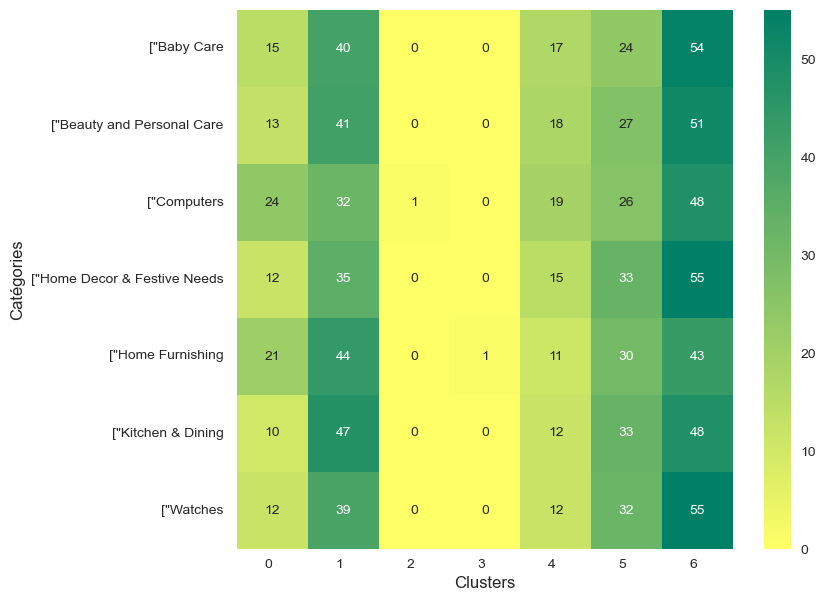

In [122]:
df_cm = pd.DataFrame(cm_, 
                     index=df_tri_cat["cat_1"].unique(), 
                     columns=np.unique(km.labels_)
                     #columns=df_train["cluster"].unique()
                    )

fig = plt.figure(figsize=(8,7))

try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap='summer_r')
except ValueError:
    raise ValueError("Confusion matrix values must be integers.")
    
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.ylabel("Catégories", size=12)
plt.xlabel("Clusters", size=12)
#/np.sum(cf_matrix)

#### <b> Réduction de dimension PCA pour ORB :<b>

In [59]:
X_orb=im_features_orb

In [60]:
time1 = time.time()
km = KMeans(n_clusters=7, init='k-means++', max_iter=1000, n_init=100)
#km = KMeans(n_clusters=7, init='k-means++', max_iter=1000)
km.fit(im_features_orb)
#km.fit_predict(feat_pca) # fit_predict
#km.fit(X)
cprint("Adjusted Rand Index: %.5f" %
      adjusted_rand_score(df_train['cat_1'], km.labels_), 'red')
      # adjusted_rand_score(df_train['image'], km.labels_), 'red')
time2 = np.round(time.time() - time1,0)
print("time : ", time2)
#print("Rand Index: %.2f" % rand_score(df_train['cat_1'], km.labels_))


Adjusted Rand Index: -0.00096
time :  3.0


Dimensions dataset avant PCA :  (1050, 721)
Dimensions dataset après PCA :  (1050, 601)


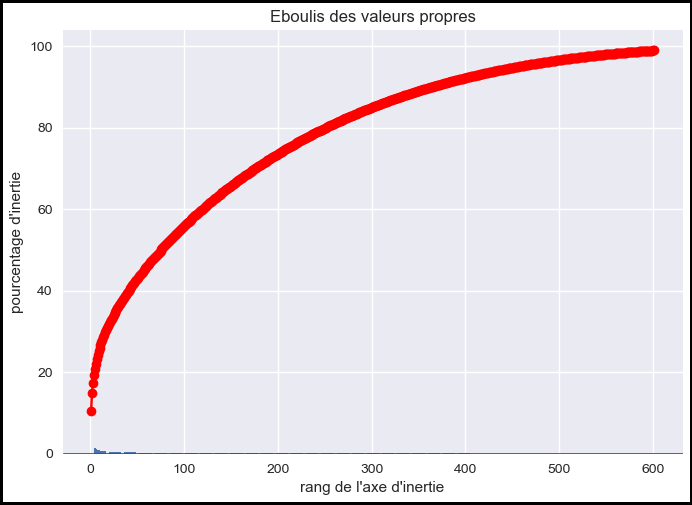

In [61]:

print("Dimensions dataset avant PCA : ", X_orb.shape)
pca = decomposition.PCA(n_components=0.99)
#X_dense = csr_matrix.todense(X)   # convertit une sparse matrix en dense matrix
#X_dense = csr_matrix.todense(tfidf_vect)   # convertit une sparse matrix en dense matrix
X_scaled = StandardScaler().fit_transform(X_orb)   # données normalisées
feat_pca_orb = pca.fit_transform(X_scaled)
print("Dimensions dataset après PCA : ", feat_pca_orb.shape)
display_scree_plot(pca)


#### <b> Kmeans Clustering pour ORB :<b>

In [62]:

time1 = time.time()
km = KMeans(n_clusters=7, init='k-means++', max_iter=1000, n_init=100)
#km = KMeans(n_clusters=7, init='k-means++', max_iter=1000)
#km.fit(feat_pca_orb)
km.fit_predict(feat_pca_orb)  #fit_predict
cprint("Adjusted Rand Index: %.5f" %
      adjusted_rand_score(df_train['cat_1'], km.labels_), 'red')
time2 = np.round(time.time() - time1,0)
print("time : ", time2)
#print("Rand Index: %.2f" % rand_score(df_train['cat_1'], km.labels_))


Adjusted Rand Index: -0.00103
time :  2.0


In [63]:
df_train['cluster']=km.labels_

In [64]:
len(km.labels_)

1050

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


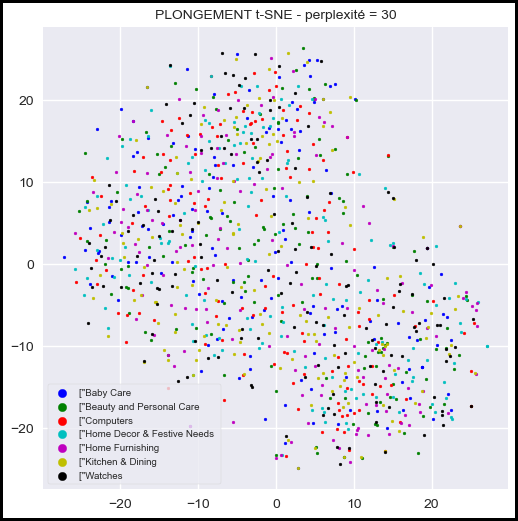

In [68]:

perplexities = [30]
plt.style.use('seaborn')
draw_tsne(feat_pca_orb, perplexities, df_train['cat_1'])


#### <b> Réduction de dimension T-SNE pour ORB :  <b>

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


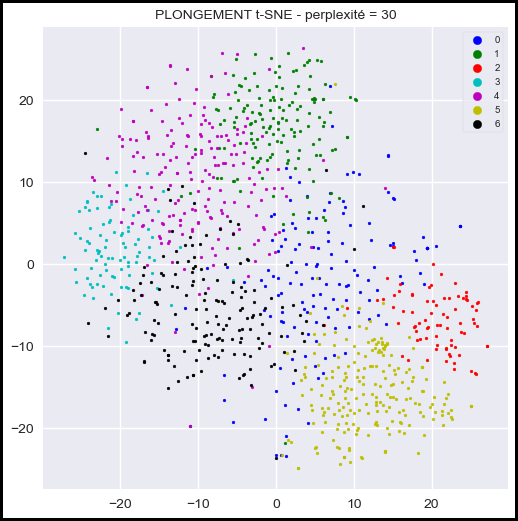

In [69]:

perplexities = [30]
plt.style.use('seaborn')
draw_tsne(feat_pca_orb, perplexities, df_train['cluster'])


In [70]:

for i in np.unique(km.labels_):
    print("Cluster", i)
   # print("Center:", km.cluster_centers_[i])
    print("Size:", sum(km.labels_ == i))
    

Cluster 0
Size: 150
Cluster 1
Size: 156
Cluster 2
Size: 81
Cluster 3
Size: 91
Cluster 4
Size: 200
Cluster 5
Size: 212
Cluster 6
Size: 160


In [91]:
df_tri_cat["cat_1"].value_counts()

["Baby Care                      150
["Beauty and Personal Care       150
["Computers                      150
["Home Decor & Festive Needs     150
["Home Furnishing                150
["Kitchen & Dining               150
["Watches                        150
Name: cat_1, dtype: int64